# Falling Ball Viscometer
## Example E3 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example demonstrates loading the configuration from a file.

In [1]:
%matplotlib inline
import suncal

In [2]:
u = suncal.UncertCalc.from_configfile('../ex_viscometer.yaml')
out = u.calculate()
out.report(n=3)

$\mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 5.69 mPa·s  | 1.03 mPa·s              
Monte Carlo        | 5.83 mPa·s  | 1.12 mPa·s

In [3]:
# Since the functions are defined in the ex_viscometer.yaml
# file, showing them here can be useful.
u.out.report_func()

$\mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$

In [4]:
u.out.report_inputs()

Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                              
----------|---------|------------------|--------------|-----------------------------------------
$\mu_{c}$   | 4.630 mPa·s  | 0.046 mPa·s           | inf       | Viscosity of calibration liquid          
$t_{m}$   | 61.0 s  | 6.1 s           | inf       | Travel time in sodium hydroxide solution 
$\rho_{m}$   | 1180.00 kg/m³  | 0.50 kg/m³           | inf       | Density of sodium hydroxide solution     
$\rho_{c}$   | 810.00 kg/m³  | 0.50 kg/m³          | inf      | Density of calibration liquid            
$t_{c}$   | 36.6 s | 5.5 s          | inf      | Travel time in calibration liquid        
$\rho_{b}$   | 2217.00 kg/m³ | 0.50 kg/m³          | inf      | Density of ball

In [5]:
u.out.report_expanded()

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 3.0 mPa·s  | 8.3 mPa·s  | 2.576     | inf            | 2.6 mPa·s              
95.00%     | 3.7 mPa·s  | 7.7 mPa·s  | 1.960     | inf            | 2.0 mPa·s              
90.00%     | 4.0 mPa·s  | 7.4 mPa·s  | 1.645     | inf            | 1.7 mPa·s              
68.00%     | 4.7 mPa·s  | 6.7 mPa·s | 0.994     | inf            | 1.0 mPa·s             


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 3.7 mPa·s  | 9.7 mPa·s  | 2.727    
95.00%     | 4.1 mPa·s  | 8.4 mPa·s  | 1.947    
90.00%     | 4.3 mPa·s  | 7.8 mPa·s  | 1.598    
68.00%     | 4.8 mPa·s  | 6.9 mPa·s  | 0.933

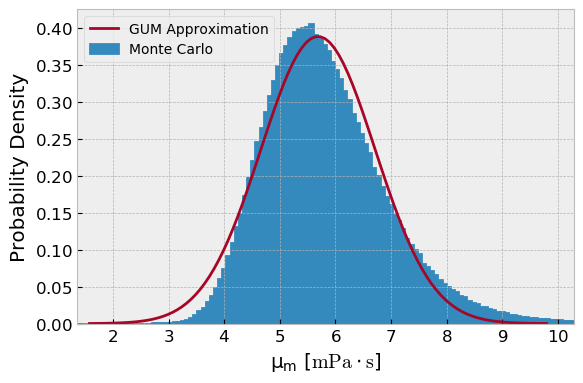

In [6]:
# Compare to NIST1900 Exhibit 3.
u.out.plot_pdf();

In [7]:
# What did the GUM calculation actually do?
u.out.report_derivation(solve=True)

### Model Equation:

$\mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)}$

### Input Definitions:


Variable   | Std. Uncertainty  
----------|------------------
$\mu_{c} = 4.63\,\mathrm{mPa} \cdot \mathrm{s}$   | $u_{mu_c} = 0.0463\,\mathrm{mPa} \cdot \mathrm{s}$          
$t_{m} = 61.0\,\mathrm{s}$   | $u_{t_m} = 6.1\,\mathrm{s}$          
$\rho_{m} = 1180.0\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$   | $u_{rho_m} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$          
$\rho_{c} = 810.0\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$   | $u_{rho_c} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$          
$t_{c} = 36.6\,\mathrm{s}$   | $u_{t_c} = 5.49\,\mathrm{s}$         
$\rho_{b} = 2217.0\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$  | $u_{rho_b} = 0.5\,\frac{\mathrm{kg}}{\mathrm{m}^{3}}$         


### Sensitivity Coefficients:

$c_{\mu c} = \frac{\partial}{\partial \mu_{c}} \mu_{m} = \frac{t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = 1.228\,$

$c_{t m} = \frac{\partial}{\partial t_{m}} \mu_{m} = \frac{\mu_{c} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = 0.09324\,\mathrm{mPa}$

$c_{\rho m} = \frac{\partial}{\partial \rho_{m}} \mu_{m} = - \frac{\mu_{c} t_{m}}{t_{c} \left(\rho_{b} - \rho_{c}\right)} = -0.005484\,\frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

$c_{\rho c} = \frac{\partial}{\partial \rho_{c}} \mu_{m} = \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}} = 0.004042\,\frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

$c_{t c} = \frac{\partial}{\partial t_{c}} \mu_{m} = - \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)} = -0.1554\,\mathrm{mPa}$

$c_{\rho b} = \frac{\partial}{\partial \rho_{b}} \mu_{m} = \frac{\mu_{c} t_{m}}{t_{c} \left(\rho_{b} - \rho_{c}\right)} - \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}} = 0.001442\,\frac{\mathrm{mPa} \cdot \mathrm{m}^{3} \cdot \mathrm{s}}{\mathrm{kg}}$

### Combined uncertainty:

$u_{\mu m} = \sqrt{c_{\mu c}^{2} u_{\mu c}^{2} + c_{\rho b}^{2} u_{\rho b}^{2} + c_{\rho c}^{2} u_{\rho c}^{2} + c_{\rho m}^{2} u_{\rho m}^{2} + c_{t c}^{2} u_{t c}^{2} + c_{t m}^{2} u_{t m}^{2}}$

$u_{\mu m} = \sqrt{u_{\mu c}^{2} \left(\frac{\partial}{\partial \mu_{c}} \mu_{m}\right)^{2} + u_{\rho b}^{2} \left(\frac{\partial}{\partial \rho_{b}} \mu_{m}\right)^{2} + u_{\rho c}^{2} \left(\frac{\partial}{\partial \rho_{c}} \mu_{m}\right)^{2} + u_{\rho m}^{2} \left(\frac{\partial}{\partial \rho_{m}} \mu_{m}\right)^{2} + u_{t c}^{2} \left(\frac{\partial}{\partial t_{c}} \mu_{m}\right)^{2} + u_{t m}^{2} \left(\frac{\partial}{\partial t_{m}} \mu_{m}\right)^{2}}$

$u_{\mu m} = \sqrt{\frac{\mu_{c}^{2} t_{m}^{2} u_{\rho c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{4}} + \frac{\mu_{c}^{2} t_{m}^{2} u_{\rho m}^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}} + \frac{\mu_{c}^{2} u_{t m}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}} + \frac{\mu_{c}^{2} t_{m}^{2} u_{t c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{4} \left(\rho_{b} - \rho_{c}\right)^{2}} + u_{\rho b}^{2} \left(\frac{\mu_{c} t_{m}}{t_{c} \left(\rho_{b} - \rho_{c}\right)} - \frac{\mu_{c} t_{m} \left(\rho_{b} - \rho_{m}\right)}{t_{c} \left(\rho_{b} - \rho_{c}\right)^{2}}\right)^{2} + \frac{t_{m}^{2} u_{\mu c}^{2} \left(\rho_{b} - \rho_{m}\right)^{2}}{t_{c}^{2} \left(\rho_{b} - \rho_{c}\right)^{2}}} = 1.027\,\mathrm{mPa} \cdot \mathrm{s}$

### Effective degrees of freedom:

$\nu_{eff} = \frac{u_{mu_m}^{4}}{\frac{c_{\mu c}^{4} u_{\mu c}^{4}}{\nu_{\mu c}} + \frac{c_{\rho b}^{4} u_{\rho b}^{4}}{\nu_{\rho b}} + \frac{c_{\rho c}^{4} u_{\rho c}^{4}}{\nu_{\rho c}} + \frac{c_{\rho m}^{4} u_{\rho m}^{4}}{\nu_{\rho m}} + \frac{c_{t c}^{4} u_{t c}^{4}}{\nu_{t c}} + \frac{c_{t m}^{4} u_{t m}^{4}}{\nu_{t m}}} = \infty$


---